1. Import Libraries

In [12]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import kaleido

import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.subplots as sp
import plotly.graph_objects as go


2. Data Exploration


In [13]:
df = pd.read_csv("BankChurners.csv")
pd.set_option('display.max_columns', 500)
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [14]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [15]:
df_drop = df.drop(axis=1, columns=['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 
                                   'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'])

Feature Exploration

    - CLIENTNUM : Unique client identifier.
    - Attrition_Flag : Indicates whether the customer's account is active or has churned.
    - Customer_Age : Age of the customer.
    - Gender : Gender of the customer.
    - Dependent_count : Number of dependents of the customer.
    - Education_Level : Educational level of the customer.
    - Marital_Status : Marital status of the customer.
    - Income_Category : Income category of the customer.
    - Card_Category : Category of the credit card held by the customer.
    - Months_on_book : Number of months the customer has been a bank client.
    - Total_Relationship_Count : Total number of bank products held by the customer.
    - Months_Inactive_12_mon : Number of months with inactivity in the last 12 months.
    - Contacts_Count_12_mon : Number of contacts with the bank in the last 12 months.
    - Credit_Limit : Credit limit on the credit card.
    - Total_Revolving_Bal : Total revolving balance on the credit card.
    - Avg_Open_To_Buy : Average open to buy credit line on the credit card.
    - Total_Amt_Chng_Q4_Q1 : Change in transaction amount over the last four quarters.
    - Total_Trans_Amt : Total transaction amount in the last 12 months.
    - Total_Trans_Ct : Total transaction count in the last 12 months.
    - Total_Ct_Chng_Q4_Q1 : Change in transaction count over the last four quarters.
    - Avg_Utilization_Ratio : Average utilization ratio of the credit card.

In [16]:
df_drop.shape

(10127, 21)

In [17]:
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [18]:
df_drop.duplicated().sum()

0

In [19]:
df_drop.isna().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [20]:
# Count the number of unique values -> in each features
df_drop.nunique()

CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   45
Gender                          2
Dependent_count                 6
Education_Level                 7
Marital_Status                  4
Income_Category                 6
Card_Category                   4
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64

In [21]:
# Describe quantitative data
df_drop.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [22]:
# Describe categorical data
df_drop.describe(include='O')

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,10127,10127,10127,10127,10127,10127
unique,2,2,7,4,6,4
top,Existing Customer,F,Graduate,Married,Less than $40K,Blue
freq,8500,5358,3128,4687,3561,9436


3. Exploratary Data Analysis 

In [23]:
# Split into Numerical Data & Categorical Data

numerical_data = ['CLIENTNUM', 'Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

categorical_data = ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category']

    3.1 - Univariate Analysis

Categorical Data Exploration

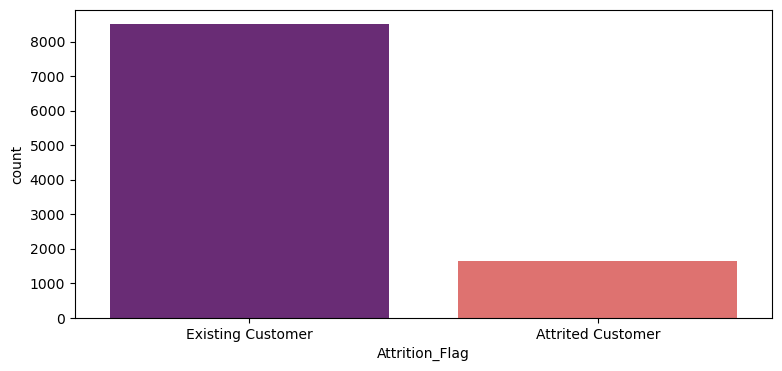

In [24]:
# Attrition_Flag Distribution

Attrition_count = df_drop['Attrition_Flag'].value_counts()

fig = plt.figure(figsize= (9,4))
sns.countplot(data = df_drop,
              x = "Attrition_Flag",
              palette="magma",
              order = df_drop["Attrition_Flag"].value_counts(ascending=False).index
              )


attrition_dist = px.pie(df_drop, names=df['Attrition_Flag'].value_counts().index, 
             title='Attrition Flag Distribution',
             color_discrete_sequence= px.colors.qualitative.Antique,
             values = df_drop['Attrition_Flag'].value_counts().values,
             width=800, height=400
            )

attrition_dist

In [25]:
# Gender Distribution

gender_dist = px.bar(x = df_drop["Gender"].value_counts().index, 
                y = df_drop["Gender"].value_counts().values,
                color_discrete_sequence= px.colors.qualitative.Antique,
                color= df_drop["Gender"].value_counts().values,
                title= "Gender Distribution",
                width= 800, height=400)

gender_dist.update_layout(showlegend=True,
                     xaxis_title="Gender", yaxis_title="Count")

gender_dist


In [26]:
# Education Level Distribtion

Education_level_dist = px.histogram(df_drop, x='Education_Level', 
                   title='Education Level Distribution',
                   color_discrete_sequence= px.colors.qualitative.Antique,
                   width= 800, height=400)

Education_level_dist.update_xaxes(categoryorder='total ascending')

Education_level_dist

In [27]:
# Martial Status Distribution

Marital_Status_dist = px.histogram(df, x='Marital_Status', 
                   title='Marital_Status Distribution',
                   color_discrete_sequence= px.colors.qualitative.Antique,
                   width= 800, height=400)

Marital_Status_dist

In [28]:
# Income Distribution

Income_dist = px.histogram(df, x='Income_Category', 
                   title='Income_Category Distribution',
                   color_discrete_sequence= px.colors.qualitative.Antique,
                   width= 800, height=400)

Income_dist.update_xaxes(categoryorder='total ascending')

Income_dist

In [29]:
# Card Category Distribution

Card_Category_dist = px.histogram(df_drop, x='Card_Category', 
                   title='Card Category Distribution',
                   color_discrete_sequence= px.colors.qualitative.Antique,
                   text_auto=True,
                   width= 800, height=400,
                   template = "seaborn")

Card_Category_dist.update_xaxes(categoryorder='total ascending')

Card_Category_dist.show()

Numerical Data Exploration

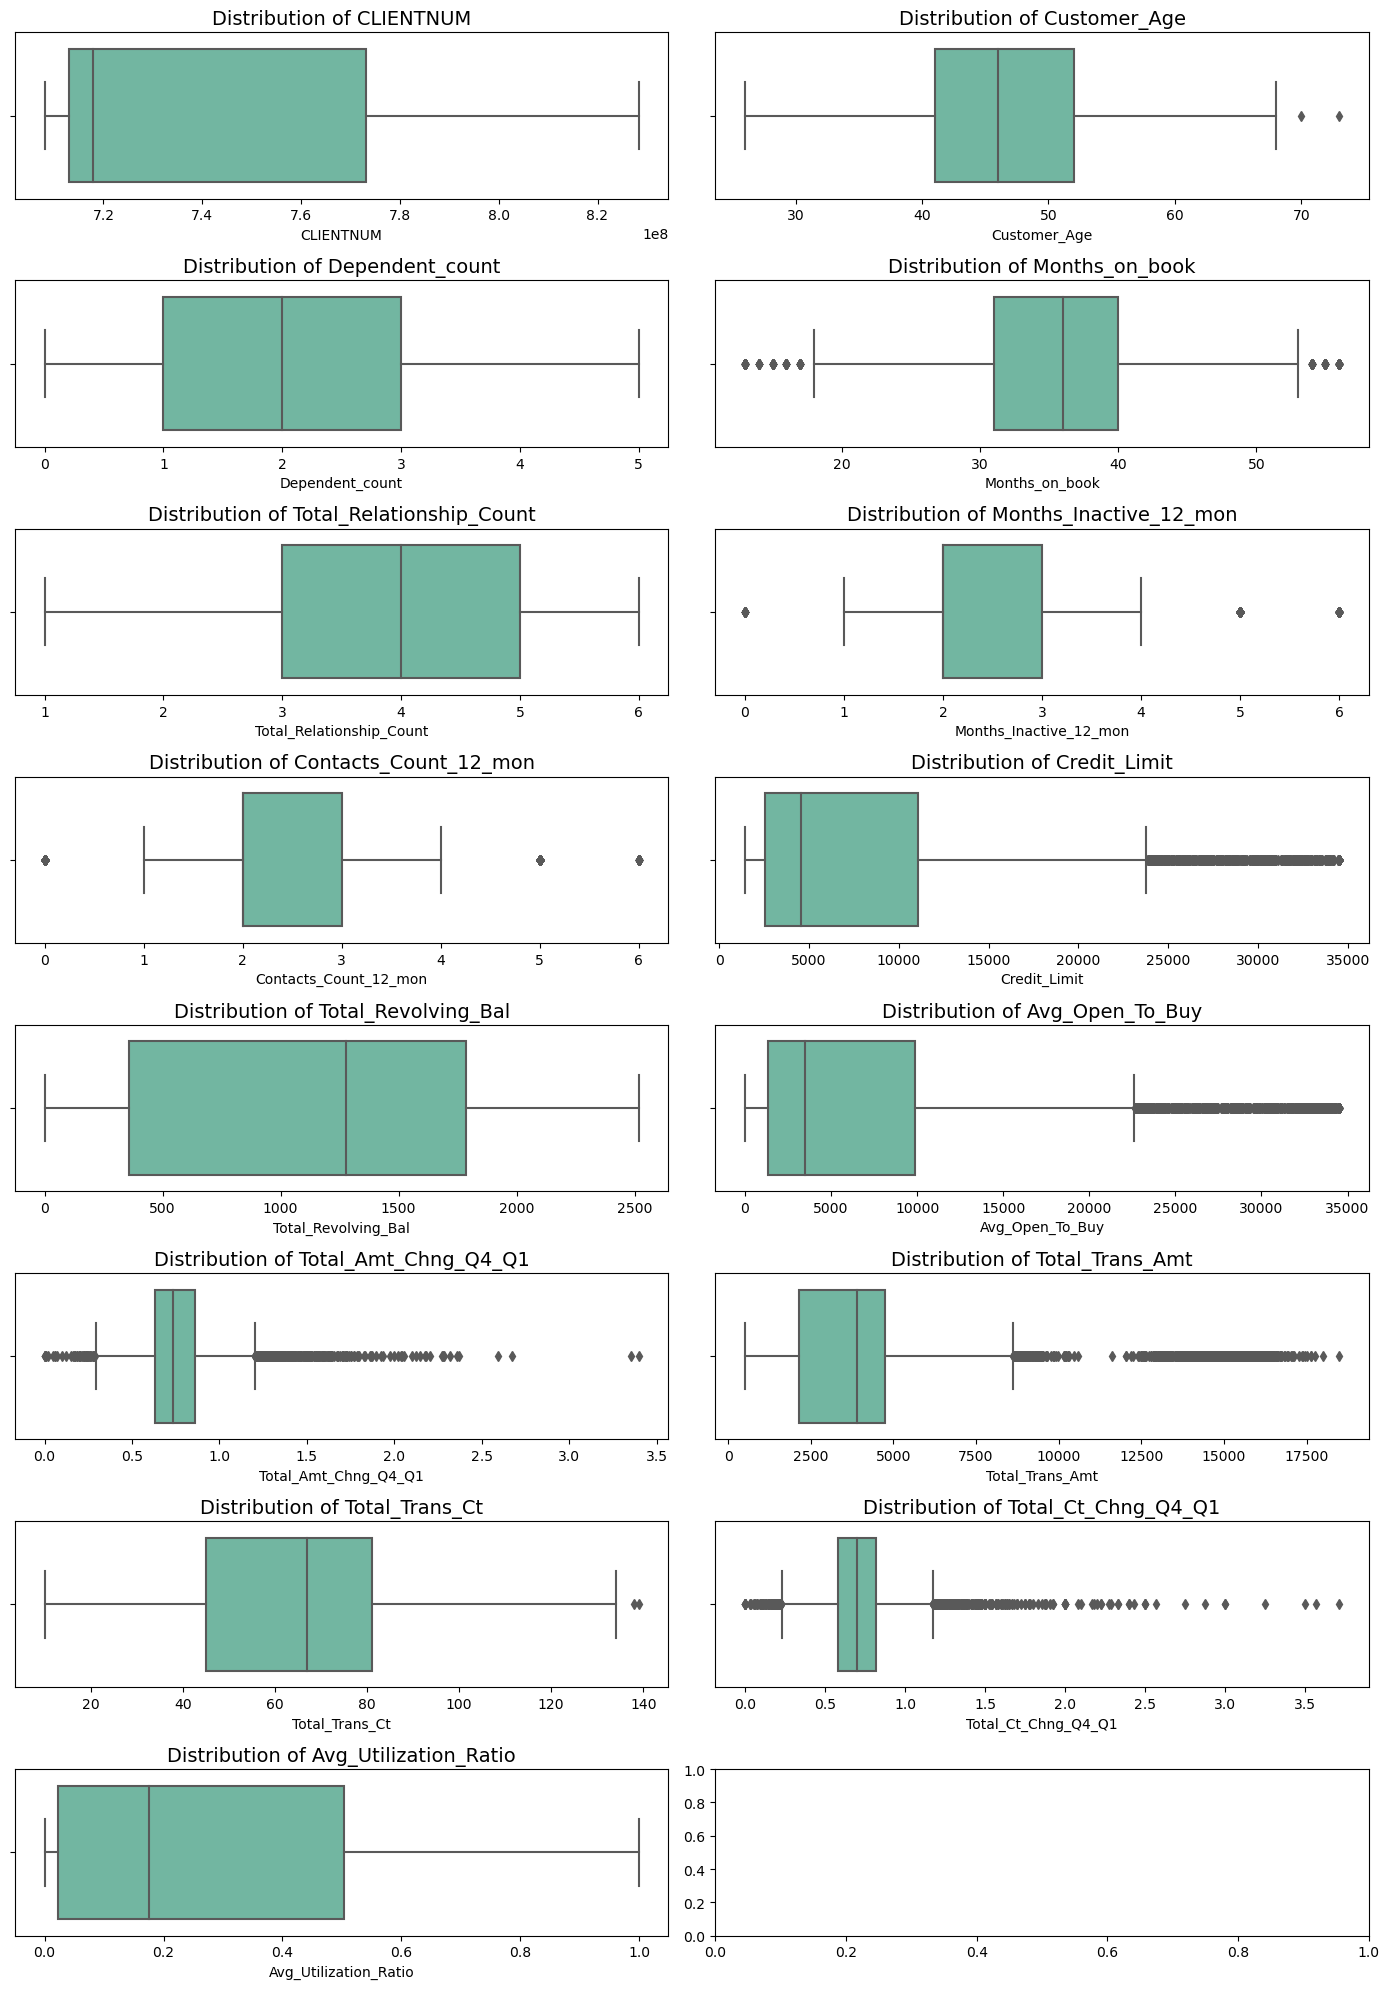

In [30]:
fig, axes = plt.subplots(8, 2, figsize= (14,20))

for i, column in enumerate(numerical_data):
    row = i // 2 # return int of the outcome
    col = i  % 2 # return remainder of the division
    sns.boxplot(data=df_drop, x=column,
                ax=axes[row, col],
                palette="Set2",
                color="skyblue")
    
    axes[row, col].set_title(f"Distribution of {column}",
                             fontsize=14)
    
plt.tight_layout()

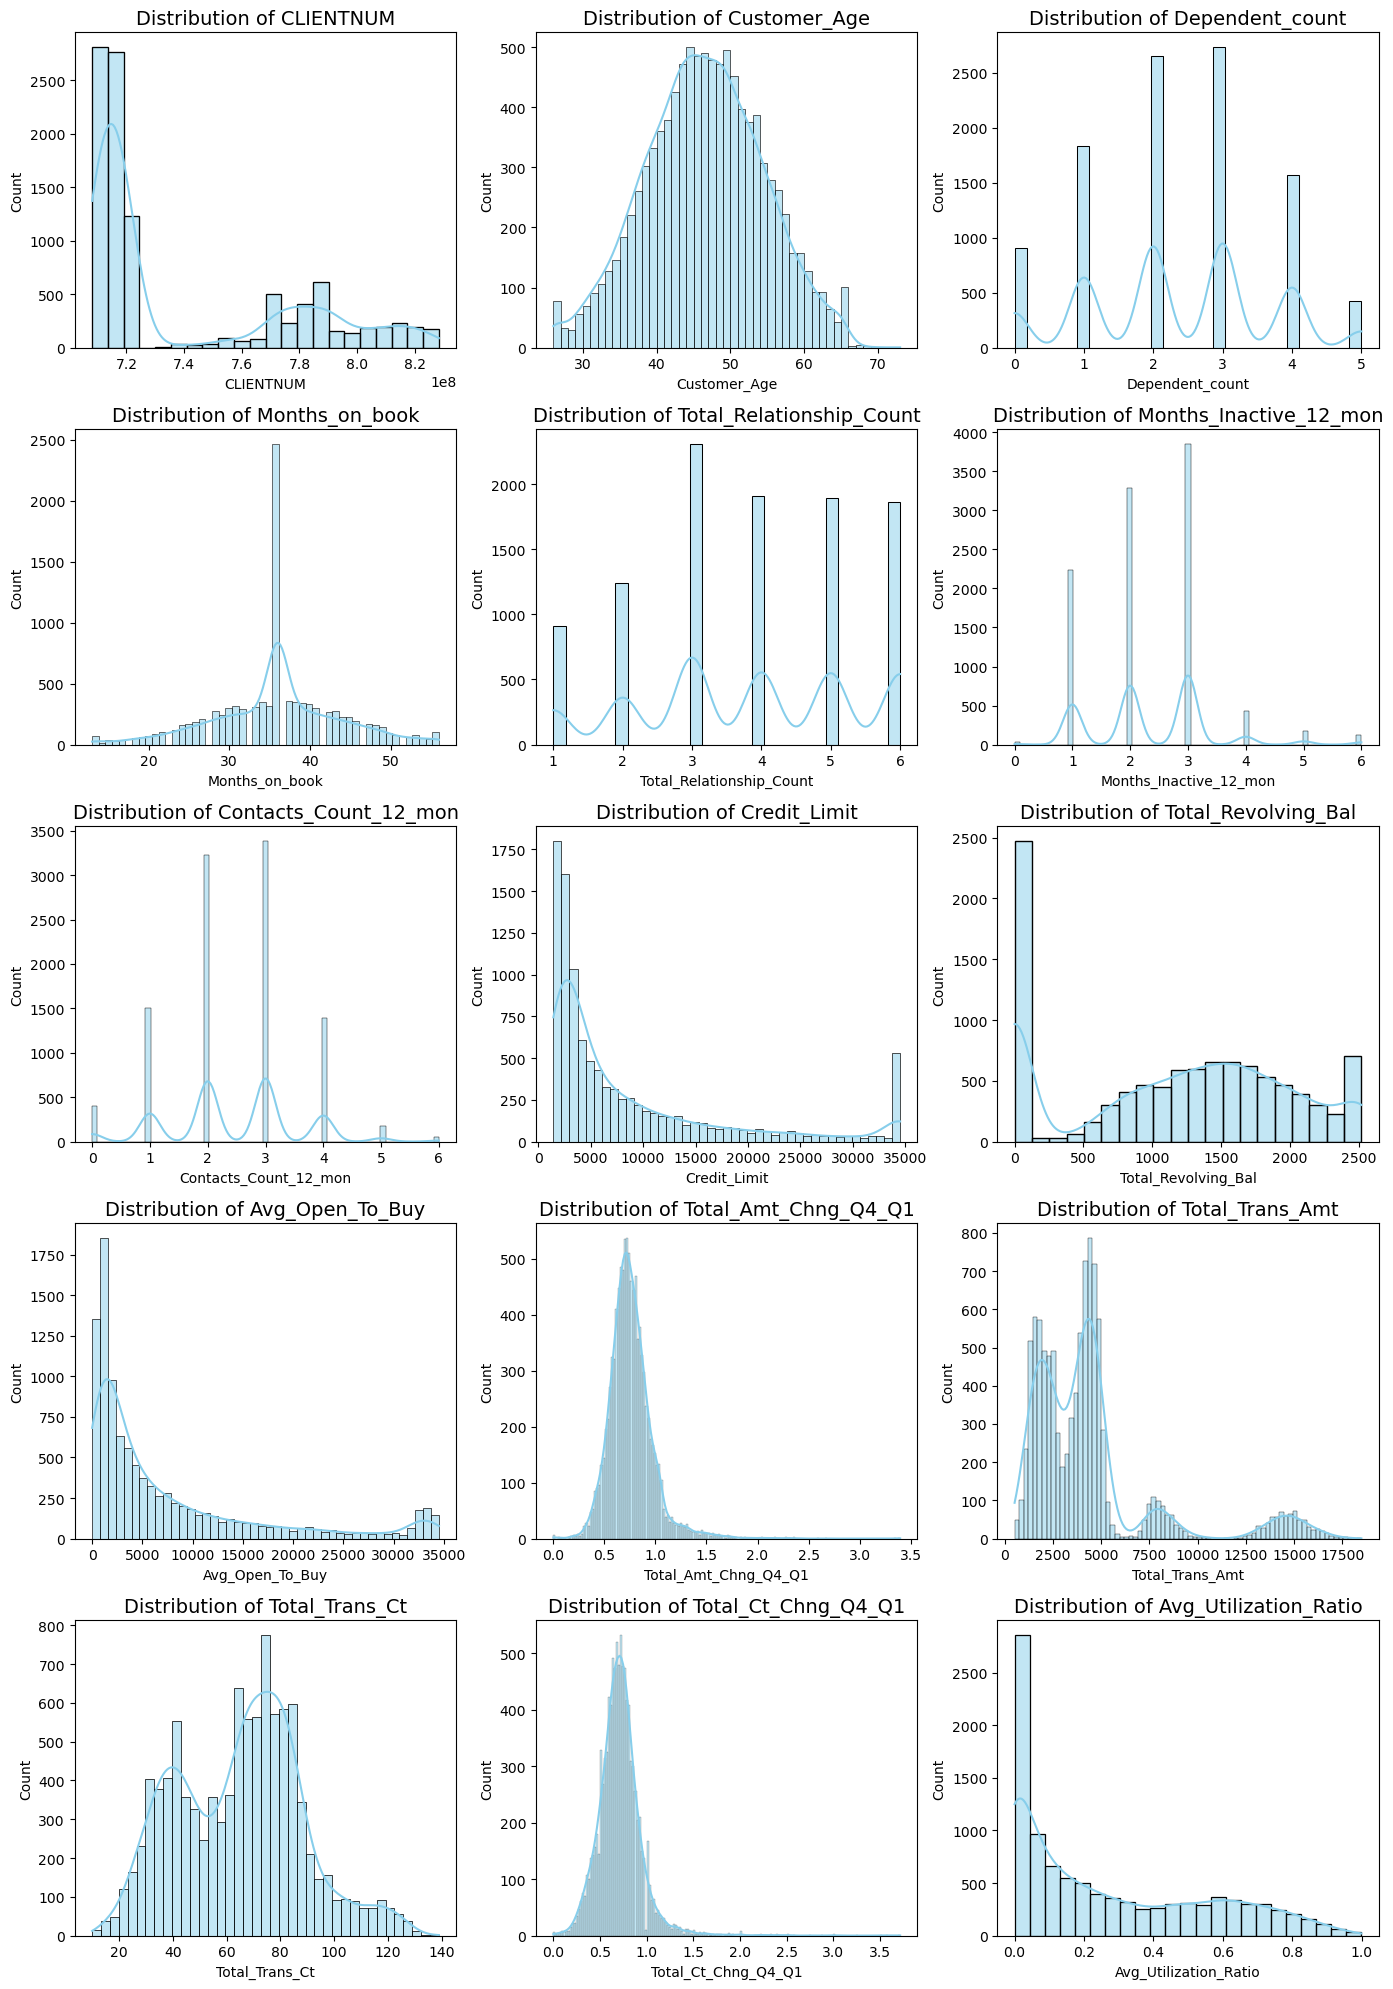

In [31]:
fig, axes = plt.subplots(5, 3, figsize=(14, 20))

for i, column in enumerate(numerical_data):
    row = i // 3 # int division, return int
    col = i % 3 # return remainder
    sns.histplot(data=df_drop, x=column,
                 kde=True, ax=axes[row, col],
                 color='skyblue')
    axes[row, col].set_title(f"Distribution of {column}",
                   fontsize=14)

plt.tight_layout()

    3.2 - Bivariate Analysis

    What is the relationship between churn status & Categorical variables?

In [32]:
fig = px.histogram(df_drop, x="Gender",
                   color="Attrition_Flag",
                   title="Churn Rate by Gender",
                   barmode="group",
                   template='plotly_white',
                   color_discrete_sequence=['#ff7f0e', '#3498db'])

# Customizing marker appearance
fig.update_traces(marker=dict(line=dict(width=2, color='DarkSlateGrey')))

fig.show()

In [33]:
fig = px.histogram(df_drop, x="Education_Level", 
                   color="Attrition_Flag",
                   barmode="group",
                   title="Churn Rate by Gender")

# Customizing marker appearance
fig.update_traces(marker=dict(line=dict(width=2, color='DarkSlateGrey')))

fig.show()

In [34]:
fig = px.histogram(df_drop, x="Marital_Status",
                   color="Attrition_Flag",
                   title= "Churn Rate by Martial Status",
                   barmode="group")

fig.update_traces(marker=dict(line=dict(width=2, color='DarkSlateGrey')))
fig.show()

In [35]:
fig = px.histogram(df_drop, x="Income_Category",
                   color="Attrition_Flag",
                   title= "Churn Rate by Income Category",
                   barmode="group")

fig.update_traces(marker=dict(line=dict(width=2, color='DarkSlateGrey')))
fig.show()

In [36]:
fig = px.histogram(df_drop, x="Card_Category",
                   color="Attrition_Flag",
                   title= "Churn Rate by Card Category",
                   barmode="group")

fig.update_traces(marker=dict(line=dict(width=2, color='DarkSlateGrey')))
fig.show()

    What is the relationship between churn status & numerical variables?

Correlation between age & churn status

In [37]:
fig = px.histogram(df_drop, x="Customer_Age", 
                   color="Attrition_Flag",
                   barmode="group",
                   marginal="box",
                   title="Churn Rate by Age",
                   labels={"Customer_Age": "Age"})

# format the layout
fig.update_layout(
    xaxis=dict(showgrid=False, zeroline=False),
    yaxis=dict(zeroline=False, gridcolor='white'),
    paper_bgcolor='rgb(233,233,233)',
    plot_bgcolor='rgb(233,233,233)',
)

fig.show()

In [38]:
fig = px.box(df_drop,  y="Credit_Limit", x="Attrition_Flag",
             color="Attrition_Flag",
             title="Correlation Between Credit limit & Churn Rate",
             labels={"Credit_Limit":"Credit Limit"})

# Format the layout
fig.update_layout(
    yaxis=dict(showgrid=False, zeroline=False),
    xaxis=dict(title='Credit Limit', zeroline=False, gridcolor='white'),
    paper_bgcolor='rgb(233,233,233)',
    plot_bgcolor='rgb(233,233,233)',
)

fig.show()

In [39]:
fig = px.box(df_drop,  y="Contacts_Count_12_mon", x="Attrition_Flag",
             color="Attrition_Flag",
             title="Correlation Between 12-month Contacts & Churn Rate",
             labels={"Contacts_Count_12_mon":"12-Month Countact"})

# Format the layout
fig.update_layout(
    yaxis=dict(showgrid=False, zeroline=False),
    xaxis=dict(title='Credit Limit', zeroline=False, gridcolor='white'),
    paper_bgcolor='rgb(233,233,233)',
    plot_bgcolor='rgb(233,233,233)',
)

fig.show()

4. Data Pre-Processing

In [40]:
# Data Preprocessing Libraries
from datasist.structdata import detect_outliers
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler
from category_encoders import BinaryEncoder
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

4.1 - Outliers

In [41]:
# Detect outliers in numerical features
outliers_indices = detect_outliers(df, features=numerical_data, n=1.5)
number_of_outliers = len(outliers_indices)

# Print the number of outliers
print(f'Number of outliers: {number_of_outliers}')

'''
# Removing all Outliers
df = df.drop(outliers_indices)
'''

Number of outliers: 1274


'\n# Removing all Outliers\ndf = df.drop(outliers_indices)\n'

4.2 - Handling Categorical Data

- Nominal (One-hot encoding): Categories without a meaningful order or ranking like (Attrition Flag, Gender, Marital Status).

- Ordinal (Ordinal Encoding): Categories with a meaningful order or ranking like (Education Level, Income Category, Card Category).

In [42]:
# Working with Ordinal Features with pandas `map` method.

attrition_flag_dic = {
    'Existing Customer' : 0,
    'Attrited Customer' : 1
}

edu_level_dic = {  
    'Unknown': 0, 
    'Uneducated': 1, 
    'High School': 2, 
    'College': 3,
    'Post-Graduate': 4, 
    'Graduate': 5, 
    'Doctorate': 6
} 

income_cat_dic = {
    'Unknown': 0,
    'Less than $40K': 1,
    '$40K - $60K': 2,
    '$60K - $80K': 3,
    '$80K - $120K': 4,
    '$120K +': 5
}

card_cat_dic = {
    'Blue': 0,
    'Silver': 1,
    'Gold': 2,
    'Platinum': 3
}

df_drop['Attrition_Flag'] = df_drop['Attrition_Flag'].map(attrition_flag_dic)

df_drop['Education_Level'] = df_drop['Education_Level'].map(edu_level_dic)

df_drop['Income_Category'] = df_drop['Income_Category'].map(income_cat_dic)

df_drop['Card_Category'] = df_drop['Card_Category'].map(card_cat_dic)

In [43]:
# Working with Nominal Features with pandas `get_dummies` function.
df_drop = pd.get_dummies(df_drop, columns=['Gender', 'Marital_Status'])

4.3 - Data Split into Train & Test Set

In [44]:
x = df_drop.drop(["Attrition_Flag"], axis=1)
y = df_drop["Attrition_Flag"]

print(f"X shape: {x.shape}")
print(f"y shape: {y.shape}")

X shape: (10127, 24)
y shape: (10127,)


In [45]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")

X_train: (8101, 24)
X_test: (2026, 24)


4.4 - Handling Numerical Data: Feature Scaling (Standardise Scaler)

In [46]:
# Create Scaler
scaler = StandardScaler()

# Fitting the Scaler onto dataset 
scaler.fit(X_train[numerical_data])

# Transform the numerical features in X-input data
X_train_scaled = scaler.transform(X_train[numerical_data])
X_test_scaled = scaler.transform(X_test[numerical_data])

# Replace scaled feature value back into dataset
X_train[numerical_data] = X_train_scaled
X_test[numerical_data] = X_test_scaled

In [47]:
X_test

,CLIENTNUM,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_F,Gender_M,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown
5991,-0.673436,-0.293343,1.280928,4,3,0,0.008576,-0.528497,-0.334786,-0.418093,-0.605565,0.291268,-0.631777,0.688303,0.007412,0.865157,0.408607,0.633855,0,1,0,1,0,0
6693,-0.826193,0.823140,-1.026224,5,2,0,0.008576,0.116285,-1.320287,-0.418093,-0.724676,0.525171,-0.771954,-0.644005,0.170834,0.139643,-0.392649,1.832043,1,0,0,1,0,0
4130,-0.824986,0.078818,-0.257173,2,1,0,-0.115704,0.116285,-0.334786,0.489213,-0.700388,-1.432224,-0.571336,0.205059,-0.075340,0.779802,-0.358912,-1.001362,1,0,0,0,1,0
4048,-0.677322,-0.293343,0.511878,2,4,0,-0.115704,-0.528497,0.650716,1.396519,1.084729,-0.146991,1.097922,-1.068537,-0.132791,0.865157,-0.932443,-0.793773,0,1,0,0,1,0
4169,-0.641189,-1.161718,-0.257173,3,4,0,0.008576,-0.528497,-0.334786,-0.418093,0.484292,0.290037,0.458143,-1.145314,0.006817,0.822480,-0.135404,-0.608036,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3380,-0.531912,-0.913611,-1.026224,5,1,0,0.008576,-0.528497,0.650716,-1.325400,-0.675102,0.144771,-0.688114,-0.946597,-0.733492,-1.311385,-0.392649,0.870579,1,0,0,1,0,0
3986,0.911766,-0.169289,1.280928,2,0,0,-0.115704,-0.528497,1.636217,-0.418093,0.024150,1.666369,-0.125964,-0.612391,0.055337,0.694448,-0.523380,0.040224,1,0,0,0,1,0
5014,-0.543710,0.699086,-1.795274,4,1,0,0.505693,0.116285,0.650716,-0.418093,-0.791740,-0.451064,-0.751071,0.494102,0.091356,0.182320,-0.607723,1.016255,1,0,0,0,1,0
3317,1.369974,-0.417397,0.511878,5,0,1,-0.364262,-0.528497,-1.320287,0.489213,2.876721,0.855096,2.799564,-0.625940,-0.050336,0.096966,-0.797494,-0.804699,1,0,0,0,0,1


4.5 - Handling Imbalance dataset using Synthetic Minority Oversampling Technique (SMOTE)
- Randomly average selected minority class, to create next dataset

In [48]:
# Original data count 
y_train.value_counts()

0    6802
1    1299
Name: Attrition_Flag, dtype: int64

In [49]:
# Data count after SMOTE
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

print(f"X_train_sm shape: {X_train_sm.shape}")
print(f"y_train_sm shape: {y_train_sm.shape}")
print(f"Unique Value Count in y_train_sm: {y_train_sm.value_counts()}")

X_train_sm shape: (13604, 24)
y_train_sm shape: (13604,)
Unique Value Count in y_train_sm: 0    6802
1    6802
Name: Attrition_Flag, dtype: int64


5. Model Training & Evaluation

In [50]:
# Machine Learing (classification models) Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.feature_selection import SequentialFeatureSelector, SelectKBest, f_regression, RFE, SelectFromModel
from imblearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report, roc_curve, roc_auc_score 
import lightgbm as lgb
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

#### XGBoost, LightGBM, Catboost

In [51]:
# Setting random_state = 42 allows the randomness of number generator across classifier to be the same

Classfiers = [
    ("Random Forest", RandomForestClassifier(random_state=42, n_jobs= -1)),
    ("AdaBoost", AdaBoostClassifier(random_state=42)),
    ("Gradient Boosting", GradientBoostingClassifier(random_state=42)),
    ("LightGBM", lgb.LGBMClassifier(random_state=42, n_jobs=-1)),
    ("XGBoost", xgb.XGBClassifier(random_state=42, n_jobs=-1)),
]

##### Recursive Feature Elimination (RFE)
- Fit model to dataset
- Eliminate feature with smallest coefficient (least important)
- Repeat step 1-2 unti desire number of features is reached

In [52]:
# RFE input (algorithm, number of features)

RFE_selector = RFE(
    lgb.LGBMClassifier(random_state=42,verbose=-1), 
    n_features_to_select=12
)

In [59]:
# Create list for classifier names, mean test accuracy score, results

results = []

# Loop through Classifiers variable for (model name, model)
for model_name, model in Classfiers:
    print(f"{model_name}:")
    
    # Create steps for pipeline
    steps = []
    steps.append(
        ("feature_selector", RFE_selector)
    )
    
    steps.append(
        (model_name, model)
    )
    
    # Create pipeline
    pipeline = Pipeline(steps=steps)
    
    # 5-fold Stratified CV parameter, to be use in CV below
    cv = StratifiedKFold(
        n_splits=10, shuffle=True, random_state=42
    )
    
    # Perform Cross Validation with train scores
        # cv_result to return 4 outputs(fit_time, score_time, test_score, train_score)
    cv_result = cross_validate(
        pipeline, X_train_sm, y_train_sm, cv=cv, scoring="accuracy", 
        n_jobs=-1, return_train_score=True
    )
        
    print(f"Cross-Validation Completed Successfully for {model_name}")
    print("*" *50)
    
    # Results to append result from cv_result
    results.append({
        "Model_Name": model_name,
        "Mean_Train_Accuracy": np.mean(cv_result["train_score"]),
        "Mean_Test_Accuracy": np.mean(cv_result["test_score"])
    }) 

Random Forest:
Cross-Validation Completed Successfully for Random Forest
**************************************************
AdaBoost:
Cross-Validation Completed Successfully for AdaBoost
**************************************************
Gradient Boosting:
Cross-Validation Completed Successfully for Gradient Boosting
**************************************************
LightGBM:
Cross-Validation Completed Successfully for LightGBM
**************************************************
XGBoost:
Cross-Validation Completed Successfully for XGBoost
**************************************************


In [72]:
# Show cv_result in pandas DataFrame
results_df = pd.DataFrame(results)
results_df.sort_values("Mean_Test_Accuracy", ascending=True)
results_df

,Model_Name,Mean_Train_Accuracy,Mean_Test_Accuracy
0,Random Forest,1.000000,0.978389
1,AdaBoost,0.957317,0.954720
2,Gradient Boosting,0.975073,0.967143
3,LightGBM,0.998873,0.983020
4,XGBoost,0.999984,0.982873


In [84]:
# Result visualised 

fig = px.bar(
    results_df, x="Mean_Test_Accuracy", y="Model_Name",
    orientation="h",
    color="Mean_Test_Accuracy",
    title="Mean Test Accuracy Score by Classifier",
    color_continuous_scale='viridis'
)

# Customizing the layout
fig.update_layout(
    xaxis_title='Test Accuracy',
    yaxis_title='Classifier',
    xaxis=dict(range=[0, 1]),
    # total ascending/category ascending
    yaxis=dict(categoryorder='total ascending'), 
    showlegend=False,
    height=500,
    width=900
)

fig